<b>Задание 1.</b> Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [55]:
import numpy as np
import math
import random

# Plotter:---------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
#--------------(plotter)-------------------------------------------

random.seed(42)
np.random.seed(42)




In [72]:

def max_min (X) : 
    max = np.amax(X)
    min = np.amin(X)
    return max,min

def calculate_uniform_a_b (mean=0,std_deviation=1) :
    c = 3 ** 0.5
    a = mean - c*std_deviation
    b = mean + c*std_deviation
    return a,b

def make_random_vector (mean=0,std_deviation=1,coordinate_number = 2, is_normal=True) :
    if (is_normal):
        return np.random.normal(mean,std_deviation,size=(coordinate_number))
    else :
        a,b = calculate_uniform_a_b(mean,std_deviation)
        return np.random.uniform(a,b,size=(coordinate_number))
    
def make_random_matrix (mean=0,std_deviation=1,row_number = 2, column_number = 2, is_normal=True) :
    if (is_normal):
        return np.random.normal(mean,std_deviation,size=(row_number,column_number))
    else :
        a,b = calculate_uniform_a_b(mean,std_deviation)
        return np.random.uniform(a,b,size=(row_number,column_number))
    
class LinearFunction :
    def __init__ (self,weights,threshold) :
        self.weights = weights
        self.threshold = threshold
    
    def reset_by_random ( self, weight_number, mean, std_deviation ):
        self.weights = make_random_vector( mean, std_deviation, weight_number, is_normal=True )
        a,b = calculate_uniform_a_b(mean,std_deviation)
        self.threshold = random.uniform(a,b)
        return self;
    
    def calculate (self,x):
        return np.dot(x,self.weights)+self.threshold
    
    def correct(self,dw,etta,dt):
        delta = dw*etta
        self.weights+=delta
        delta = dt*etta
        self.threshold+=delta
        return self
    
    def calculate_with_delta(self,x,y):
        return self.calculate(x)-y
    
    def calculate_with_error(self,x,y):
        result = self.calculate_with_delta(x,y) ** 2
        return result/2
    
def make_linear_correlated_data (mean,std_deviation,noise_deviation,coordinate_number,data_object_number) :
    
    linear_function = LinearFunction (None,None).reset_by_random(coordinate_number,mean,std_deviation)
    vectors = make_random_matrix(mean,std_deviation,data_object_number,coordinate_number,is_normal=True)
    
    weighted_vectors = linear_function.calculate(vectors)
    noised_weighted_vectors = weighted_vectors + make_random_vector(0,noise_deviation,data_object_number,is_normal=True)
    
    return noised_weighted_vectors,vectors,linear_function;
    

#nvs,vs,lf = make_linear_correlated_data(0,3,2,10)
#vs


0 adapting before [2.22988788]-3.159329294728304-5.418401286981304
0 adapting after [2.22988788]-3.159329294728304-0.009931922913947086
1 adapting before [1.48651032]-1.7241424632143356-0.08817993835946474
1 adapting after [1.48651032]-1.7241424632143356-0.009971132487376567
2 adapting before [0.20091175]--0.46138984921649345-0.48088571304858774
2 adapting after [0.20091175]--0.46138984921649345-0.009987890974257957
3 adapting before [2.2594958]-0.06629344358244404-1.0301133348604175
3 adapting after [2.2594958]-0.06629344358244404-0.009928462449910264
4 adapting before [-1.03627631]--1.3464640064616624-0.023328443930176416
4 adapting after [-1.03627631]--1.3464640064616624-0.009959275737706825
5 adapting before [-0.35100707]--1.2589983864537393-0.06388068836915606
5 adapting after [-0.35100707]--1.2589983864537393-0.00997855198424561
6 adapting before [-0.44630011]--0.4410351229167666-0.26308300449335636
6 adapting after [-0.44630011]--0.4410351229167666-0.00998948430200569
7 adapting

60 adapting after [0.25364125]--0.4448470740558609-0.00998138694508115
61 adapting before [2.72450803]-7.121744279074354-5.652417371422374
61 adapting after [2.72450803]-7.121744279074354-0.0099331286651536
62 adapting before [1.44486541]--0.7716079357817527-8.688142822493678
62 adapting after [1.44486541]--0.7716079357817527-0.009947595088329523
63 adapting before [2.90147727]-5.978288606498072-13.910108730595054
63 adapting after [2.90147727]-5.978288606498072-0.009890311579202445
64 adapting before [1.433092]-4.222723533071131-2.1064084457238295
64 adapting after [1.433092]-4.222723533071131-0.009979131120338332
65 adapting before [-0.73567493]--3.6773186395584263-0.07874140262648723
65 adapting after [-0.73567493]--3.6773186395584263-0.009998441244380893
66 adapting before [-0.99969253]--3.442962371363802-0.5215779749949122
66 adapting after [-0.99969253]--3.442962371363802-0.009995338827097012
67 adapting before [-1.32726837]--5.541124610640969-0.4502982022294226
67 adapting after

126 adapting after [1.51608088]-2.8239107014082974-0.00997946092946971
127 adapting before [1.52251261]--0.8968914851795977-7.543295020204168
127 adapting after [1.52251261]--0.8968914851795977-0.009986484389088347
128 adapting before [-0.3467451]--4.736441035316366-0.30234369280213413
128 adapting after [-0.3467451]--4.736441035316366-0.009993231586638533
129 adapting before [0.26844194]--2.132272457398992-0.8287322445606293
129 adapting after [0.26844194]--2.132272457398992-0.009980530085779194
130 adapting before [2.61149951]-2.189189335640933-0.23551236052684865
130 adapting after [2.61149951]-2.189189335640933-0.009875870602696237
131 adapting before [1.74460018]-3.482683449993809-4.205089579863951
131 adapting after [1.74460018]-3.482683449993809-0.009961468140558325
132 adapting before [4.11259756]-4.943628849669896-17.932914996847128
132 adapting after [4.11259756]-4.943628849669896-0.009726370656533905
133 adapting before [2.77019226]-2.08083038092278-0.1258730934463642
133 ad

186 adapting after [3.73081586]-5.88282392410404-0.009736803023330987
187 adapting before [0.15040811]--3.5459366449664955-0.2695444427711964
187 adapting after [0.15040811]--3.5459366449664955-0.009996186736207429
188 adapting before [2.24742518]-2.8983785169594154-1.0880774101666035
188 adapting after [2.24742518]-2.8983785169594154-0.009919759211463486
189 adapting before [1.31420513]-5.013581292993269-11.843883146020438
189 adapting after [1.31420513]-5.013581292993269-0.00998592255494538
190 adapting before [-0.47680108]-0.08491178348196149-9.254367264792911
190 adapting after [-0.47680108]-0.08491178348196149-0.009996122189150436
191 adapting before [0.99106794]-3.927423216249594-0.597336430822823
191 adapting after [0.99106794]-3.927423216249594-0.009985114828248728
192 adapting before [2.17600417]-3.522688527645666-8.325491914783226
192 adapting after [2.17600417]-3.522688527645666-0.009952458741468096
193 adapting before [0.717608]-2.4906998501548028-0.497215546169501
193 adap

245 adapting after [1.78483478]-6.2165791723058925-0.009976161910143428
246 adapting before [-0.83048103]--4.603860690946105-0.2295437799959126
246 adapting after [-0.83048103]--4.603860690946105-0.009981592497375128
247 adapting before [-2.0260082]--5.386418464425418-7.853709512531745
247 adapting after [-2.0260082]--5.386418464425418-0.009925949984993472
248 adapting before [-3.24848889]--6.410319072014447-2.553148654664688
248 adapting after [-3.24848889]--6.410319072014447-0.009882403610092955
249 adapting before [2.22097129]-4.392941568806103-0.010116494065264893
249 adapting after [2.22097129]-4.392941568806103-0.009996813615140928
250 adapting before [1.19292618]--0.12099388882348228-2.742321578738957
250 adapting after [1.19292618]--0.12099388882348228-0.009953392420009831
251 adapting before [0.66151543]--5.609794659568972-13.292357059900704
251 adapting after [0.66151543]--5.609794659568972-0.009991747153381634
252 adapting before [3.08353654]-7.067254437149067-127.4378358347

315 adapting after [3.11040212]-6.343942450250797-0.009973897528241227
316 adapting before [0.27382226]--0.0332569703892841-1.313100928601039
316 adapting after [0.27382226]--0.0332569703892841-0.0099883653002002
317 adapting before [2.43290386]-1.6488309244482682-12.351133514182381
317 adapting after [2.43290386]-1.6488309244482682-0.00995340547385711
318 adapting before [0.94188566]-4.350643159300224-11.141311939269574
318 adapting after [0.94188566]-4.350643159300224-0.009965666347968314
319 adapting before [0.08747385]--0.787089580833559-1.6311009511239931
319 adapting after [0.08747385]--0.787089580833559-0.009991866242342535
320 adapting before [1.88879546]-0.15911834324923158-16.023542007986286
320 adapting after [1.88879546]-0.15911834324923158-0.009994749395327277
321 adapting before [1.61445418]-3.4586583077131356-6.183661924410978
321 adapting after [1.61445418]-3.4586583077131356-0.0099598228269746
322 adapting before [1.53545914]-2.4012749839393672-0.2405614248802088
322 a

386 adapting after [2.80367687]-3.1409248757430133-0.009925146602413984
387 adapting before [-0.64290578]--2.1972119015470932-0.00032844514291685176
387 adapting after [-0.64290578]--2.1972119015470932-0.00032844514291685176
388 adapting before [-3.76505572]--6.39311047476457-0.2581440237830354
388 adapting after [-3.76505572]--6.39311047476457-0.009786808651445886
389 adapting before [1.41862579]--1.0669687870546303-1.983526973495003
389 adapting after [1.41862579]--1.0669687870546303-0.00998150066035737
390 adapting before [1.43734552]-0.0623058225886739-0.4776205746930626
390 adapting after [1.43734552]-0.0623058225886739-0.00997189012040048
391 adapting before [-1.53600744]--2.923811104363361-2.7505961235393333e-05
391 adapting after [-1.53600744]--2.923811104363361-2.7505961235393333e-05
392 adapting before [-0.46774932]-2.2512842807270372-8.643408086938527
392 adapting after [-0.46774932]-2.2512842807270372-0.009984397153303695
393 adapting before [5.13282662]-7.704719612478701-3

448 adapting after [0.01948129]--2.2641835080344626-0.009981255340478683
449 adapting before [-0.20956539]--0.770883719367078-0.9079364222921215
449 adapting after [-0.20956539]--0.770883719367078-0.009985993751655736
450 adapting before [1.11354241]--1.535711039130898-0.03845017879927207
450 adapting after [1.11354241]--1.535711039130898-0.009968048704371159
451 adapting before [2.02838462]--0.5082166590054578-0.7051658935625776
451 adapting after [2.02838462]--0.5082166590054578-0.009898471852424344
452 adapting before [0.78752712]--3.968295522903614-5.1610896568520825
452 adapting after [0.78752712]--3.968295522903614-0.009970116434052663
453 adapting before [2.74955582]-5.198946832903543-69.46508759544547
453 adapting after [2.74955582]-5.198946832903543-0.009912211705367642
454 adapting before [1.79646349]-0.9773907061179419-1.7233893795107476
454 adapting after [1.79646349]-0.9773907061179419-0.0099819532338654
455 adapting before [-2.26731698]-0.7199620529219279-18.7431208044966

506 adapting after [-0.68007113]--0.15843384004741745-0.009977399401771057
507 adapting before [2.00636687]-2.5148639682879153-7.918076313125427
507 adapting after [2.00636687]-2.5148639682879153-0.009937138085942968
508 adapting before [1.90568578]-4.4449513074074884-1.7849997371863575
508 adapting after [1.90568578]-4.4449513074074884-0.00994403694063875
509 adapting before [0.41218485]--0.5260697154861899-2.5702198876961218
509 adapting after [0.41218485]--0.5260697154861899-0.009982670220493178
510 adapting before [-0.52664646]--7.094099408739746-16.82912010942746
510 adapting after [-0.52664646]--7.094099408739746-0.009995394671705436
511 adapting before [-0.54110533]--2.379104149654661-10.678340030985126
511 adapting after [-0.54110533]--2.379104149654661-0.009981290627972124
512 adapting before [0.44009763]-1.7841291722319235-4.222119519867325
512 adapting after [0.44009763]-1.7841291722319235-0.009994601786194606
513 adapting before [1.96677774]-0.5821234179485817-11.4856530886

566 adapting after [2.59013461]-4.679567206614287-0.009982130178443367
567 adapting before [0.92271561]--0.37210297642809076-1.6849191322386483
567 adapting after [0.92271561]--0.37210297642809076-0.009974546784198176
568 adapting before [1.75463555]-6.101267855479639-15.128607555002427
568 adapting after [1.75463555]-6.101267855479639-0.009977009661194637
569 adapting before [0.52187753]--1.8163094188699356-6.852496849672511
569 adapting after [0.52187753]--1.8163094188699356-0.009984414457598605
570 adapting before [-0.54471777]-2.1290230449574414-16.65450876373141
570 adapting after [-0.54471777]-2.1290230449574414-0.009984105360734866
571 adapting before [0.8149839]-0.39803789033246373-0.3888977536201934
571 adapting after [0.8149839]-0.39803789033246373-0.009997753897306437
572 adapting before [1.46357116]--1.2732521106911003-0.7686602605041032
572 adapting after [1.46357116]--1.2732521106911003-0.009992220519637428
573 adapting before [0.01646842]-1.6491914287983012-0.29076099300

632 adapting after [-1.39909214]--4.146044063349314-0.009985027278827564
633 adapting before [4.41562975]-6.074256271145069-107.05577259583193
633 adapting after [4.41562975]-6.074256271145069-0.009595110246075868
634 adapting before [-0.851768]--2.392607700652791-3.554532057407079
634 adapting after [-0.851768]--2.392607700652791-0.009981443061083724
635 adapting before [-0.54794943]-0.05573251660046186-1.257384614644571
635 adapting after [-0.54794943]-0.05573251660046186-0.00999336622651127
636 adapting before [0.33961119]--3.527321190733864-12.542187922347928
636 adapting after [0.33961119]--3.527321190733864-0.00998832053307493
637 adapting before [2.93211359]-0.1493929136315355-3.923004950266124
637 adapting after [2.93211359]-0.1493929136315355-0.009929954186140627
638 adapting before [1.0217635]--0.4794878179487405-1.2891401622473604
638 adapting after [1.0217635]--0.4794878179487405-0.009976327437943496
639 adapting before [-0.85420369]--5.897927489399811-1.70736627903691
639 

693 adapting after [2.4344425]-3.0082463008424254-0.0099388108059829
694 adapting before [4.48700996]-6.170211782904228-0.016979441116631775
694 adapting after [4.48700996]-6.170211782904228-0.009743977872602559
695 adapting before [0.97449089]--0.009821707711009098-0.37659051518236475
695 adapting after [0.97449089]--0.009821707711009098-0.009987181324203119
696 adapting before [1.75753163]--1.0968398421146446-2.331392861916662
696 adapting after [1.75753163]--1.0968398421146446-0.009940503462787314
697 adapting before [1.12677771]-1.4093716101906884-3.2971654129932224
697 adapting after [1.12677771]-1.4093716101906884-0.009995598112464062
698 adapting before [-0.070377]--1.3215534458821334-0.29075043756788393
698 adapting after [-0.070377]--1.3215534458821334-0.009995843143324315
699 adapting before [-1.73114042]--2.6935773457226677-0.5976660712992752
699 adapting after [-1.73114042]--2.6935773457226677-0.00997487545066286
700 adapting before [-0.05866022]--1.0330726854597092-0.00893

757 adapting after [2.11991705]--0.3141966707735322-0.009986655817555862
758 adapting before [1.48836673]-2.0369171850113785-3.4246914807549875
758 adapting after [1.48836673]-2.0369171850113785-0.009943638292559362
759 adapting before [4.41373814]-10.4908090401904-5.627866413529702
759 adapting after [4.41373814]-10.4908090401904-0.00960051512390927
760 adapting before [-0.27833696]--3.3768966242567147-2.147353029170699
760 adapting after [-0.27833696]--3.3768966242567147-0.009985503371769004
761 adapting before [1.77715255]-0.4874785071941119-2.901299517868619
761 adapting after [1.77715255]-0.4874785071941119-0.009949681984900186
762 adapting before [0.20619849]--2.4921594041705326-0.0009320441629628345
762 adapting after [0.20619849]--2.4921594041705326-0.0009320441629628345
763 adapting before [-0.30393048]--0.2056348237367447-5.635032718693113
763 adapting after [-0.30393048]--0.2056348237367447-0.009993145483805033
764 adapting before [0.98369929]-1.524251475537242-0.09246893259

818 adapting after [1.09349702]--0.4976194103018574-0.009999231329784012
819 adapting before [1.16075487]-2.9087853521987928-5.0760903509241935
819 adapting after [1.16075487]-2.9087853521987928-0.00997220438612438
820 adapting before [-0.61776911]--1.95926949640459-0.0005557163590187161
820 adapting after [-0.61776911]--1.95926949640459-0.0005557163590187161
821 adapting before [0.73705821]--0.7629505450988989-2.871604371534602
821 adapting after [0.73705821]--0.7629505450988989-0.00998100757000666
822 adapting before [1.5989764]--0.8914270772983695-1.3584468310428301
822 adapting after [1.5989764]--0.8914270772983695-0.009944966993304279
823 adapting before [1.54059009]--0.17291775710871948-0.1992675061599604
823 adapting after [1.54059009]--0.17291775710871948-0.009981638852909088
824 adapting before [1.75643178]--1.2859462569225284-0.7429728020779626
824 adapting after [1.75643178]--1.2859462569225284-0.009936308586294792
825 adapting before [1.4364471]-1.4541440883887264-3.9687595

877 adapting after [-1.00379361]--0.9608473265115713-0.009981208495321775
878 adapting before [2.08620484]-3.5692339052679967-0.4085153103070155
878 adapting after [2.08620484]-3.5692339052679967-0.009962466969044211
879 adapting before [2.93613764]-3.362941505553966-1.3256646831640846
879 adapting after [2.93613764]-3.362941505553966-0.009953480571228022
880 adapting before [4.88186346]-9.01974049748528-6.0087111728228475
880 adapting after [4.88186346]-9.01974049748528-0.009617252055831759
881 adapting before [-0.7995879]--2.7172215407894336-1.8011312251784801
881 adapting after [-0.7995879]--2.7172215407894336-0.009991735917270077
882 adapting before [2.04837953]-0.3504116435835498-9.576147966147278
882 adapting after [2.04837953]-0.3504116435835498-0.00998452196767055
883 adapting before [0.38529813]--1.2398565886574242-0.02973236019952012
883 adapting after [0.38529813]--1.2398565886574242-0.009979940431840804
884 adapting before [2.17503807]-2.90777449214948-3.042827503360177
884

940 adapting after [0.61757954]--2.7379526061165005-0.00998646981581269
941 adapting before [1.38425591]-0.45067029644767675-4.079925409812184
941 adapting after [1.38425591]-0.45067029644767675-0.009951856115197315
942 adapting before [2.78996651]-3.2514235855503153-0.3043130611514319
942 adapting after [2.78996651]-3.2514235855503153-0.009922867755843754
943 adapting before [-0.15761122]--1.6246118984848705-0.07844462746102004
943 adapting after [-0.15761122]--1.6246118984848705-0.009988213150015754
944 adapting before [0.25305723]--0.49946614158580716-0.16112254440115573
944 adapting after [0.25305723]--0.49946614158580716-0.009988339800103954
945 adapting before [0.23119883]-0.675426806848151-0.9188848183373253
945 adapting after [0.23119883]-0.675426806848151-0.009988812546251225
946 adapting before [-0.20229139]--2.3642945078425983-2.00249916156681
946 adapting after [-0.20229139]--2.3642945078425983-0.00998515815877665
947 adapting before [0.47922026]-0.011236932771579777-0.1667

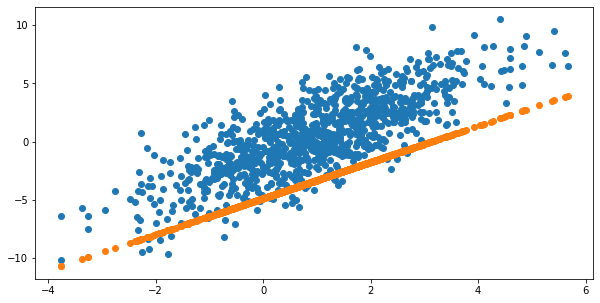

In [73]:

    
class LinearRegression :
    
    def __init__ (self):
        self.linear_function = None;
    
    def fit (self, X,Y):
        self.initialize(X);
        self.adapt(X,Y,0.01,0.001);
        return self;
        
    def predict (self,X):
        return self.linear_function.calculate(X)
        
    def initialize (self,X):
        max,min = max_min(X)
        self.linear_function = LinearFunction(None,None).reset_by_random(X.shape[1],0.0,(max-min)/100)
        return self;
        
    def adapt (self, X,Y,dE,etta):
        for k in range(0,Y.size):
            error = self.linear_function.calculate_with_error(X[k],Y[k])
            print ("{} adapting before {}-{}-{}".format(k,X[k],Y[k],error))
            while error>dE :
                dE_dT = self.linear_function.calculate_with_delta(X[k],Y[k])
                dE_dW = X[k]*dE_dT
                self.linear_function.correct(dE_dW,-1*etta,dE_dT)
                error = self.linear_function.calculate_with_error(X[k],Y[k])
                #print ("  error={}".format(error))
            print ("{} adapting after {}-{}-{}".format(k,X[k],Y[k],error))
        return self;

    
Y,X,l = make_linear_correlated_data( mean =1, std_deviation =1.5,noise_deviation=2, coordinate_number =1,data_object_number =1000)
linear_regression = LinearRegression().fit(X,Y)
Y_predict = linear_regression.predict(X);

plt.scatter(X,Y)
plt.scatter(X,Y_predict)
    
#lf = LinearFunction([1,0],-1);
#lf.calculate([[1,0],[0,1]])